In [9]:
# MNIST Handwritten Digit Classification using Neural Network

# Step 1: Install and import required libraries
!pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist



In [10]:
# Step 2: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


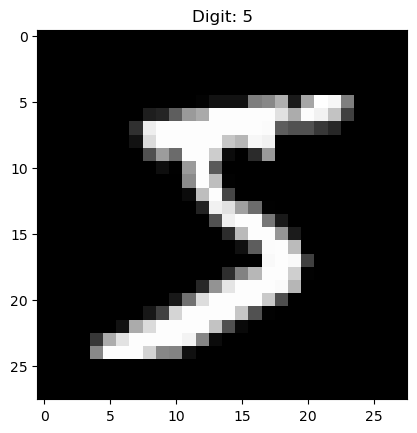

In [11]:
# Step 3: Display one example image
image = train_images[0]
label = train_labels[0]
plt.imshow(image, cmap='gray')
plt.title(f"Digit: {label}")
plt.show()



In [12]:
# Step 4: Preprocess the data
# Flatten 28x28 images into 784 features
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Convert to float and normalize pixel values (0–1)
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255



In [13]:
# Step 5: Build the Neural Network model
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [14]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [15]:
# Step 7: Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8697 - loss: 0.4612
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9665 - loss: 0.1188
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9790 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9853 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9887 - loss: 0.0383


In [16]:
# Step 8: Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9774 - loss: 0.0759

✅ Test Accuracy: 98.08%


In [17]:
# Step 9: Predict first 10 test digits
test_digits = test_images[0:10]
predictions = model.predict(test_digits)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Image 0: Predicted = 7, Actual = 7


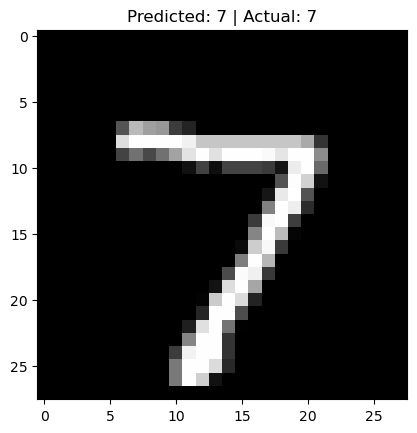

Image 1: Predicted = 2, Actual = 2


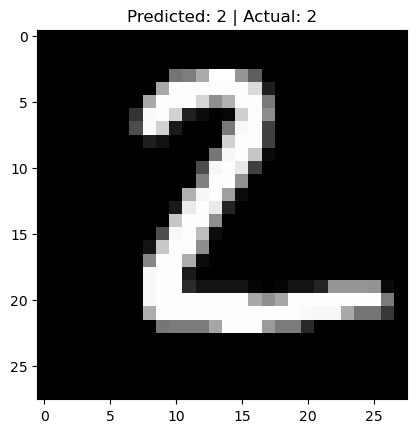

Image 2: Predicted = 1, Actual = 1


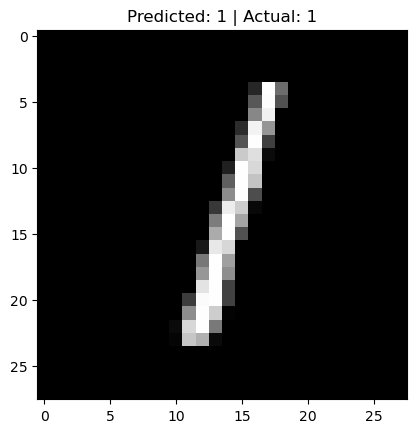

In [18]:
# Step 10: Display first prediction result
for i in range(3):
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i]
    print(f"Image {i}: Predicted = {predicted_label}, Actual = {actual_label}")

    plt.imshow(test_digits[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
    plt.show()